In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
file_names = {
    "train": "data/train_task_C1.xlsx",
    "test": "data/test_task_C1.xlsx",
    "val": "data/val_task_C1.xlsx",
    "mf_train": "data/mf_features_train_task_C1.xlsx",
    "mf_test": "data/mf_features_test_task_C1.xlsx",
    "mf_val": "data/mf_features_val_task_C1.xlsx",
    "nlfl_train": "data/nlfl_train_sample_v3.xlsx",
    "nlfl_test": "data/nlfl_test_sample_v3.xlsx",
    "nlfl_val": "data/nlfl_val_sample_v3.xlsx",
}

In [3]:
A_train = pd.read_excel(file_names["train"], index_col="id").sample(frac = 1, random_state=2022).reset_index()
A_val = pd.read_excel(file_names["val"])
A_test = pd.read_excel(file_names["test"])

In [4]:
%%time
mf_A_train = pd.read_excel(file_names["mf_train"])
mf_A_val = pd.read_excel(file_names["mf_val"])
mf_A_test = pd.read_excel(file_names["mf_test"])

CPU times: user 1min 51s, sys: 164 ms, total: 1min 51s
Wall time: 1min 51s


In [5]:
%%time
mf_A_train = mf_A_train.set_index("id").loc[A_train["id"]].reset_index()
mf_A_test = mf_A_test.set_index("id").loc[A_test["id"]].reset_index()
mf_A_val = mf_A_val.set_index("id").loc[A_val["id"]].reset_index()

CPU times: user 74.3 ms, sys: 28 ms, total: 102 ms
Wall time: 102 ms


In [6]:
%%time
nlfl_A_train = pd.read_excel(file_names["nlfl_train"])
nlfl_A_val = pd.read_excel(file_names["nlfl_val"])
nlfl_A_test = pd.read_excel(file_names["nlfl_test"])

CPU times: user 14.4 s, sys: 36.1 ms, total: 14.5 s
Wall time: 14.5 s


In [7]:
%%time
nlfl_A_train = nlfl_A_train.set_index("id").loc[A_train["id"]].reset_index()
nlfl_A_test = nlfl_A_test.set_index("id").loc[A_test["id"]].reset_index()
nlfl_A_val = nlfl_A_val.set_index("id").loc[A_val["id"]].reset_index()

CPU times: user 13.2 ms, sys: 346 µs, total: 13.5 ms
Wall time: 12.5 ms


In [8]:
nlfl_rel_cols = [c for c in nlfl_A_train.columns if "chatgpt_label" != c and "chatgpt_" in c]
nlfl_rel_cols

['chatgpt_v1 (N)',
 'chatgpt_v1 (Y)',
 'chatgpt_v2 (N)',
 'chatgpt_v2 (Y)',
 'chatgpt_v3 (N)',
 'chatgpt_v3 (Y)',
 'chatgpt_v4 (N)',
 'chatgpt_v4 (Y)',
 'chatgpt_v5 (N)',
 'chatgpt_v5 (Y)',
 'chatgpt_v6 (N)',
 'chatgpt_v6 (Y)',
 'chatgpt_v7 (N)',
 'chatgpt_v7 (Y)',
 'chatgpt_v8 (N)',
 'chatgpt_v8 (Y)',
 'chatgpt_v9 (N)',
 'chatgpt_v9 (Y)',
 'chatgpt_v10 (N)',
 'chatgpt_v10 (Y)',
 'chatgpt_v5_1 (N)',
 'chatgpt_v5_1 (Y)',
 'chatgpt_v5_2 (N)',
 'chatgpt_v5_2 (Y)',
 'chatgpt_v5_3 (N)',
 'chatgpt_v5_3 (Y)',
 'chatgpt_v5_4 (N)',
 'chatgpt_v5_4 (Y)',
 'chatgpt_v5_5 (N)',
 'chatgpt_v5_5 (Y)',
 'chatgpt_v6_1 (N)',
 'chatgpt_v6_1 (Y)',
 'chatgpt_v6_2 (N)',
 'chatgpt_v6_2 (Y)',
 'chatgpt_v6_3 (N)',
 'chatgpt_v6_3 (Y)',
 'chatgpt_v6_4 (N)',
 'chatgpt_v6_4 (Y)',
 'chatgpt_Q3_1 (N)',
 'chatgpt_Q3_1 (Y)',
 'chatgpt_Q3_2 (N)',
 'chatgpt_Q3_2 (Y)',
 'chatgpt_Q3_3 (N)',
 'chatgpt_Q3_3 (Y)',
 'chatgpt_Q3_4 (N)',
 'chatgpt_Q3_4 (Y)',
 'chatgpt_Q3_5 (N)',
 'chatgpt_Q3_5 (Y)',
 'chatgpt_Q3_6 (N)',
 'chatgpt

In [9]:
%%time
new_nlfl_A_test = nlfl_A_test.copy()
new_nlfl_A_train = nlfl_A_train.copy()
new_nlfl_A_val = nlfl_A_val.copy()

bigcut = ['chatgpt_v7 (N)', 'chatgpt_v7 (Y)', 'chatgpt_v8 (N)',
       'chatgpt_v9 (N)', 'chatgpt_v9 (Y)', 'chatgpt_v10 (Y)',
       'chatgpt_v5_2 (Y)', 'chatgpt_v5_4 (Y)', 'chatgpt_v6_1 (Y)',
       'chatgpt_Q3_4 (Y)', 'chatgpt_Q3_5 (Y)', 'chatgpt_Q3_7 (Y)',
       'chatgpt_Q3_7_e1 (Y)', 'chatgpt_10_e1 (N)', 'chatgpt_10_e2 (N)',
       'chatgpt_10_e2 (Y)', 'chatgpt_10_e3 (N)', 'chatgpt_10_e3 (Y)',
       'chatgpt_10_e5 (N)', 'chatgpt_7_e1 (Y)', 'chatgpt_7_e2 (N)',
       'chatgpt_7_e2 (Y)', 'chatgpt_7_e3 (N)', 'chatgpt_7_e5 (N)',
       'chatgpt_Q3_4_e2 (N)', 'chatgpt_Q3_5_e2 (N)',
       'chatgpt_Q3_5_e4 (Y)', 'chatgpt_Q3_5_e5 (Y)', 'chatgpt_HF_1 (Y)',
       'chatgpt_HF_2 (N)', 'chatgpt_HF_2 (Y)', 'chatgpt_HF_3 (Y)',
       'chatgpt_HF_4 (Y)', 'chatgpt_HF_6 (Y)', 'chatgpt_SP_1 (N)',
       'chatgpt_SP_3 (N)', 'chatgpt_SP_3 (Y)', 'chatgpt_SP_5 (Y)',
       'chatgpt_SP_6 (Y)']
len(bigcut)

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 8.24 ms


39

In [10]:
mf_rel_cols = ['contextual<&>Q[quién|cuál|qué]',
 'contextual<&>A[binary(si|no)]',
 'contextual<&>Q[propn]+&A+',
 'contextual<&>Q[quién|cuál]',
 'contextual<&>Q[(ser*&correcto)|(tener&razón)]',
 'contextual<&>Q[ser*&correcto]',
 'contextual<&>Q[tener&razón]',
 'contextual<&>injection_index',
 'traditional<&>prop_punct',
 'semantic<&>A.isface()',
 'traditional<&>A.isdigit()',
 'traditional<&>frec_char(k)',
 'traditional<&>frec_char(y)',
 'traditional<&>frec_char(x)',
 'traditional<&>frec_char(ñ)',
 'semantic<&>A.is(nose)',
 'traditional<&>A.is(nan)',
 'semantic<&>A.is(ola|hola)',
 'semantic<&>A.contains(bad-word)',
 'semantic<&>A.contains(punct_faces)',
 'traditional<&>prop_no_math_punct',
 'traditional<&>max_vowel_rep_char_per_token',
 'traditional<&>num_tokens',
 'traditional<&>num_numbers',
 'traditional<&>num_math_punct',
 'semantic<&>num_keywords',
 'semantic<&>ratio_ud',
 'semantic<&>ratio_slang',
 'semantic<&>ratio_keywords',
 'traditional<&>ratio_vowel',
 'traditional<&>ratio_punct',
 'traditional<&>exist_numbs',
 'traditional<&>max_len_number']

In [11]:
len(mf_rel_cols)

33

<AxesSubplot: >

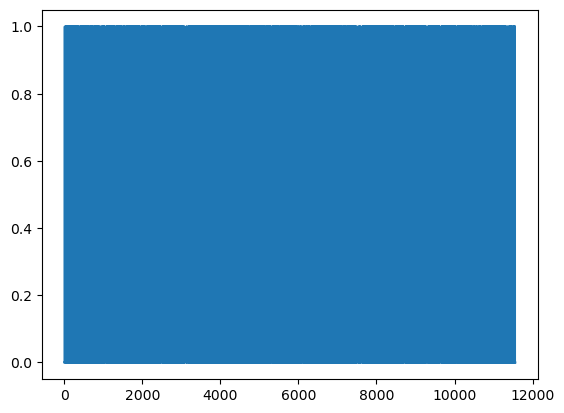

In [12]:
A_train["label"].plot()

In [13]:
%%capture
!pip install transformers
!pip install datasets
!pip install torch

In [14]:
from transformers import BertTokenizer, BertModel
import torch

In [15]:
model_name = "dccuchile/bert-base-spanish-wwm-cased"
beto_model = BertModel.from_pretrained(model_name)
beto_tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=False)
e = beto_model.eval()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
beto_tokenizer.all_special_tokens, beto_tokenizer.all_special_ids

(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'], [3, 5, 1, 4, 0])

In [17]:
from torch.utils.data import Dataset
class DatasetTaskC1(Dataset):
    def __init__(self, df, df_mf, maxlen):
        self.df = df
        self.df_mf = df_mf
        self.tokenizer = beto_tokenizer
        self.maxlen = maxlen

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        sentence1 = str(self.df.loc[index, 'Q'])
        sentence2 = str(self.df.loc[index, 'A'])
        
        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())

        label = self.df.loc[index, 'label']
        
        tokens1 = self.tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = self.tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]

        if len(tokens1) < self.maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(self.maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:self.maxlen]

        if len(tokens2) < self.maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(self.maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:self.maxlen]
          
        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]
        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1
        
        mf_tensor = torch.tensor(self.df_mf.loc[index, :].values)
        nlfl_tensor = torch.tensor(self.df.loc[index, :][bigcut])
        

        return nlfl_tensor, mf_tensor, tokens_ids_tensor, attn_mask, label

In [22]:
from torch.utils.data import DataLoader

train_set = DatasetTaskC1(df = new_nlfl_A_train, df_mf=mf_A_train[mf_rel_cols].astype(float), maxlen = 60)
val_set = DatasetTaskC1(df = new_nlfl_A_test, df_mf=mf_A_test[mf_rel_cols].astype(float), maxlen = 60)

train_loader = DataLoader(train_set, batch_size = 32, num_workers = 2, shuffle=False)
val_loader = DataLoader(val_set, batch_size = 32, num_workers = 2, shuffle=False)

In [23]:
new_nlfl_A_train.iloc[0:][bigcut]

,chatgpt_v7 (N),chatgpt_v7 (Y),chatgpt_v8 (N),chatgpt_v9 (N),chatgpt_v9 (Y),chatgpt_v10 (Y),chatgpt_v5_2 (Y),chatgpt_v5_4 (Y),chatgpt_v6_1 (Y),chatgpt_Q3_4 (Y),...,chatgpt_HF_2 (N),chatgpt_HF_2 (Y),chatgpt_HF_3 (Y),chatgpt_HF_4 (Y),chatgpt_HF_6 (Y),chatgpt_SP_1 (N),chatgpt_SP_3 (N),chatgpt_SP_3 (Y),chatgpt_SP_5 (Y),chatgpt_SP_6 (Y)
0,0.050355,0.954416,0.861216,0.891981,0.079516,0.867311,0.425349,0.290060,0.742486,0.403959,...,0.486101,0.407081,0.266678,0.344915,0.399653,0.211885,0.227395,0.782670,0.440286,0.205009
1,0.061304,0.947527,0.503022,0.654293,0.343887,0.817359,0.649023,0.647596,0.767244,0.700911,...,0.286041,0.739698,0.624346,0.635999,0.668484,0.223496,0.239130,0.797414,0.670254,0.664460
2,0.041318,0.957472,0.497123,0.801994,0.166432,0.856645,0.682702,0.733705,0.804858,0.559936,...,0.307068,0.611335,0.604869,0.649069,0.623687,0.121597,0.135982,0.866083,0.720078,0.692664
3,0.048473,0.949204,0.752415,0.908994,0.054206,0.588132,0.210189,0.219829,0.299731,0.222005,...,0.549203,0.262470,0.248231,0.207272,0.240789,0.403232,0.382491,0.644244,0.243091,0.245129
4,0.732937,0.275971,0.923895,0.949580,0.037766,0.143635,0.065245,0.068979,0.049644,0.063891,...,0.921751,0.068854,0.072694,0.061435,0.091090,0.921096,0.911064,0.090232,0.089723,0.084049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,0.059784,0.929024,0.922781,0.947646,0.027274,0.164997,0.035877,0.036507,0.045182,0.046671,...,0.887980,0.049046,0.048388,0.047008,0.047582,0.866427,0.852742,0.068038,0.045668,0.043510
11555,0.050023,0.956522,0.860114,0.924603,0.057695,0.817929,0.318834,0.291960,0.649999,0.369862,...,0.590166,0.327267,0.276181,0.336579,0.389948,0.259128,0.203707,0.827148,0.362717,0.277307
11556,0.380095,0.588984,0.856748,0.923227,0.072501,0.308636,0.139451,0.141873,0.112474,0.114684,...,0.831090,0.157382,0.159395,0.111050,0.161683,0.842161,0.820981,0.164617,0.181063,0.168443
11557,0.084956,0.873752,0.743644,0.883923,0.040208,0.326852,0.111856,0.090749,0.097967,0.097853,...,0.669376,0.123866,0.115130,0.079318,0.126849,0.603205,0.554979,0.291034,0.112915,0.100972


In [43]:
import torch.nn as nn
class C1Classifier(nn.Module):
    def __init__(self):
        super(C1Classifier, self).__init__()
        torch.manual_seed(2022)
        
        self.bert_layer = BertModel.from_pretrained(model_name).cuda()
        self.cls_layer = nn.Linear(39+33+768, 2).cuda()
        # self.cls_layer2 = nn.Linear(768, 2).cuda()

    def forward(self, nlfls, mfs, seq, attn_masks):

        cont_reps = self.bert_layer(seq, attention_mask=attn_masks)
        
        cls_rep = cont_reps.last_hidden_state[:, 0]
        mfs = mfs.to(cls_rep.dtype)
        nlfls = nlfls.to(cls_rep.dtype)
        cls_rep = torch.cat((mfs,cls_rep), 1)
        cls_rep = torch.cat((nlfls,cls_rep), 1)
        
        logits = self.cls_layer(cls_rep)
        # logits = self.cls_layer2(inter)

        return logits

In [44]:
import torch.optim as optim

net = C1Classifier()

weights = torch.tensor([1., 6.5])
criterion = nn.CrossEntropyLoss(weight=weights, reduction='mean').cuda()

opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
def get_accuracy_from_logits(logits, labels):
    probs = torch.sigmoid(logits)
    soft_probs = probs.argmax(1)
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc
    
def evaluate(net, criterion, dataloader):
    net.eval()
    mean_acc, mean_loss = 0, 0
    count = 0
    with torch.no_grad():
        for nlfls, mfs, seq, attn_masks, labels in dataloader:
            nlfls, mfs, seq, attn_masks, labels = nlfls.cuda(), mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(nlfls, mfs, seq, attn_masks)
            mean_loss += criterion(logits, labels).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def evaluate_precision_recall_fscore_support(net, dataloader):
    net.eval()
    preds = []
    tests = []
    with torch.no_grad():
        for nlfls, mfs, seq, attn_masks, labels in dataloader:
            nlfls, mfs, seq, attn_masks, labels = nlfls.cuda(), mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(nlfls, mfs, seq, attn_masks)
            probs = torch.sigmoid(logits)
            soft_probs = probs.argmax(1)
            preds += soft_probs.squeeze().tolist()
            tests += labels.tolist()
    return tests, preds

In [46]:
def train(net, criterion, opti, train_loader, val_loader, epochs):
    for ep in range(epochs):
        for it, (nlfls, mfs, seq, attn_masks, labels) in enumerate(train_loader):
            opti.zero_grad()  

            nlfls, mfs, seq, attn_masks, labels = nlfls.cuda(), mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()

            logits = net(nlfls, mfs, seq, attn_masks)

            loss = criterion(logits, labels)

            loss.backward()

            opti.step()

            if (it + 1) % 100 == 0:
                acc = get_accuracy_from_logits(logits, labels)
                # tests, preds = evaluate_precision_recall_fscore_support(net, train_loader)
                # print(classification_report(tests, preds))
                print("Iteration {} of epoch {} complete. Loss : {} Train Accuracy : {}".format(it+1, ep+1, loss.item(), acc))
        val_acc, val_loss = evaluate(net, criterion, val_loader)
        tests, preds = evaluate_precision_recall_fscore_support(net, val_loader)
        print(classification_report(tests, preds))
        print("Epoch {} complete! Validation Accuracy : {}, Validation Loss : {}".format(ep+1, val_acc, val_loss))

In [48]:
epochs = 1
train(net, criterion, opti, train_loader, val_loader, epochs)

Iteration 100 of epoch 1 complete. Loss : 0.07518334686756134 Train Accuracy : 0.9375
Iteration 200 of epoch 1 complete. Loss : 0.08865189552307129 Train Accuracy : 0.96875
Iteration 300 of epoch 1 complete. Loss : 0.06835414469242096 Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       541
           1       0.80      0.79      0.79       136

    accuracy                           0.92       677
   macro avg       0.87      0.87      0.87       677
weighted avg       0.92      0.92      0.92       677

Epoch 1 complete! Validation Accuracy : 0.9127840995788574, Validation Loss : 0.45458202030171047


In [49]:
from huggingface_hub import notebook_login

In [1]:
notebook_login()

In [51]:
!git config --global credential.helper store

In [2]:
repo_name = "beto_best_nllf_hf_ft_task_C1"
net.bert_layer.push_to_hub(repo_name)

In [3]:
val_set.tokenizer.push_to_hub(repo_name)

In [54]:
torch.save(net.cls_layer, "cls_layer.torch")
# torch.save(net.cls_layer2, "cls_layer2.torch")

In [55]:
from huggingface_hub import hf_hub_url, cached_download

In [57]:
repo_name = "beto_best_nllf_hf_ft_task_C1"
config_file_url = hf_hub_url("X/"+repo_name, filename="cls_layer.torch")
value = cached_download(config_file_url)
cls_layer = torch.load(value)
# config_file_url = hf_hub_url("X/"+repo_name, filename="cls_layer2.torch")
# value = cached_download(config_file_url)
# cls_layer2 = torch.load(value)

In [58]:
beto_model = BertModel.from_pretrained("X/"+repo_name).cuda()
beto_tokenizer = BertTokenizer.from_pretrained("X/"+repo_name, do_lower_case=False)
e = beto_model.eval()

In [59]:
def preproccesing(Q, A, maxlen=60):
        sentence1 = str(Q)
        sentence2 = str(A)
        
        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())
        
        tokens1 = beto_tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = beto_tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]

        if len(tokens1) < maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:maxlen]

        if len(tokens2) < maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:maxlen]
          
        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]
        # tokens = [x for x in tokens if x!="[PAD]"]
        tokens_ids = beto_tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1

        return tokens_ids_tensor.cuda(), attn_mask.cuda()

In [60]:
def C1Classifier(nlfls, mfs, Q, A):
    tokens_ids_tensor, attn_mask = preproccesing(Q, A)
    cont_reps = beto_model(tokens_ids_tensor.unsqueeze(0), attention_mask = attn_mask.unsqueeze(0))
    cls_rep = cont_reps.last_hidden_state[:, 0]
    mfs = torch.tensor(mfs).cuda()
    nlfls = torch.tensor(nlfls).cuda()
    mfs = mfs.to(cls_rep.dtype).unsqueeze(0)
    nlfls = nlfls.to(cls_rep.dtype).unsqueeze(0)
    cls_rep = torch.cat((mfs,cls_rep), 1)
    cls_rep = torch.cat((nlfls,cls_rep), 1)
    logits = cls_layer(cls_rep)
    # logits = cls_layer2(inter)
    probs = torch.sigmoid(logits)
    return probs.detach().cpu().numpy()[0]

In [61]:
i = 0
mfs = mf_A_train.iloc[i][mf_rel_cols].values
nlfls = new_nlfl_A_train.iloc[i][bigcut]
Q = A_train.iloc[i]["Q"], 
A = A_train.iloc[i]["A"]
print(Q, A)
C1Classifier(nlfls, mfs, Q, A)

('Luis compró 10 caramelos, de los cuales 4 tenían menta, los demás no. ¿Cuántos caramelos no tenían menta? Representa esta ecuación.',) tiene 30 en total


array([0.7481085, 0.3794723], dtype=float32)

In [62]:
from sklearn.metrics import classification_report

In [63]:
%%time
y_pred = [ int(
    C1Classifier(
        nlfls = new_nlfl_A_train.iloc[i][bigcut],
        mfs = mf_A_train.iloc[i][mf_rel_cols].values,
        Q=A_train.iloc[i]["Q"], 
        A=A_train.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_train.shape[0])
]
report = classification_report(A_train["label"], y_pred, output_dict=True)
train_report = pd.DataFrame(report)
train_report

CPU times: user 1min 45s, sys: 20.3 ms, total: 1min 45s
Wall time: 1min 45s


,0,1,accuracy,macro avg,weighted avg
precision,0.997453,0.869191,0.978112,0.933322,0.980365
recall,0.977243,0.983766,0.978112,0.980505,0.978112
f1-score,0.987245,0.922936,0.978112,0.955091,0.978677
support,10019.000000,1540.000000,0.978112,11559.000000,11559.000000


In [64]:
pickle.dump(y_pred, open("data/y_pred_train_beto_best_nllf_hf_ft_task_C1.pickle", "wb"))

In [65]:
%%time
y_pred = [ int(
    C1Classifier(
        new_nlfl_A_val.iloc[i][bigcut],
        mf_A_val.iloc[i][mf_rel_cols].values,
        A_val.iloc[i]["Q"], 
        A_val.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_val.shape[0])]
report = classification_report(A_val["label"], y_pred, output_dict=True)
val_report = pd.DataFrame(report)
val_report

CPU times: user 26.4 s, sys: 104 µs, total: 26.4 s
Wall time: 26.4 s


,0,1,accuracy,macro avg,weighted avg
precision,0.978111,0.774942,0.947895,0.876527,0.950910
recall,0.961355,0.860825,0.947895,0.911090,0.947895
f1-score,0.969660,0.815629,0.947895,0.892645,0.949038
support,2510.000000,388.000000,0.947895,2898.000000,2898.000000


In [66]:
pickle.dump(y_pred, open("data/y_pred_val_beto_best_nllf_hf_ft_task_C1.pickle", "wb"))

In [67]:
%%time
y_pred = [ int(
    C1Classifier(
        new_nlfl_A_test.iloc[i][bigcut],
        mf_A_test.iloc[i][mf_rel_cols].values,
        A_test.iloc[i]["Q"], 
        A_test.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_test.shape[0])]
report = classification_report(A_test["label"], y_pred, output_dict=True)
test_report = pd.DataFrame(report)
test_report

CPU times: user 6.13 s, sys: 12 µs, total: 6.13 s
Wall time: 6.13 s


,0,1,accuracy,macro avg,weighted avg
precision,0.948718,0.824427,0.924668,0.886573,0.923750
recall,0.957486,0.794118,0.924668,0.875802,0.924668
f1-score,0.953082,0.808989,0.924668,0.881035,0.924136
support,541.000000,136.000000,0.924668,677.000000,677.000000


In [68]:
pickle.dump(y_pred, open("data/y_pred_test_beto_best_nllf_hf_ft_task_C1.pickle", "wb"))

In [69]:
import pandas as pd 
import pickle
from sklearn.metrics import classification_report
import numpy as np

file_names = {
    "train": "data/train_task_C1.xlsx",
    "test": "data/test_task_C1.xlsx",
    "val": "data/val_task_C1.xlsx",
    "mf_train": "data/mf_features_train_task_C1.xlsx",
    "mf_test": "data/mf_features_test_task_C1.xlsx",
    "mf_val": "data/mf_features_val_task_C1.xlsx",
    "nlfl_train": "data/nlfl_train_sample_v2.xlsx",
    "nlfl_test": "data/nlfl_test_sample_v2.xlsx",
    "nlfl_val": "data/nlfl_val_sample_v2.xlsx",
}
A_test = pd.read_excel(file_names["test"])
test_label_Q = pd.read_excel("data/gpt_label_v7_comp.xlsx")
A_test["label_Q"] = A_test.apply(lambda x: test_label_Q[test_label_Q["id"] == x["id"]].iloc[0]["tipo_preg"], axis=1)
y_pred = pickle.load(open("data/y_pred_test_beto_best_nllf_hf_ft_task_C1.pickle", "rb"))
sub_index_test = A_test["label_Q"] == 3
print(classification_report(A_test.loc[A_test[sub_index_test].index]["label"], np.array(y_pred)[sub_index_test.values], digits=4))

              precision    recall  f1-score   support

           0     0.9809    0.9809    0.9809       262
           1     0.8780    0.8780    0.8780        41

    accuracy                         0.9670       303
   macro avg     0.9295    0.9295    0.9295       303
weighted avg     0.9670    0.9670    0.9670       303

